#### Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [12]:
df.drop(['Address','SellerG','Regionname'], 1, inplace=True)

In [14]:
df.drop(['CouncilArea'],1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [15]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Postcode',
       'Propertycount', 'Distance'],
      dtype='object')

In [24]:
encode = ['Method', 'Type', 'Suburb']
le = LabelEncoder()
for a in encode:
    df[a] = le.fit_transform(df[a])

In [31]:
df['Date'] = pd.to_datetime(df['Date']).dt.month

In [32]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
xgb = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=220)
xgb.fit(X_train, y_train)

C:\Users\julia\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:31:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=220,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
xgb.score(X_test, y_test)

0.7270188261408121

([<matplotlib.axis.YTick at 0x23478c1d208>,
 <a list of 8 Text yticklabel objects>)

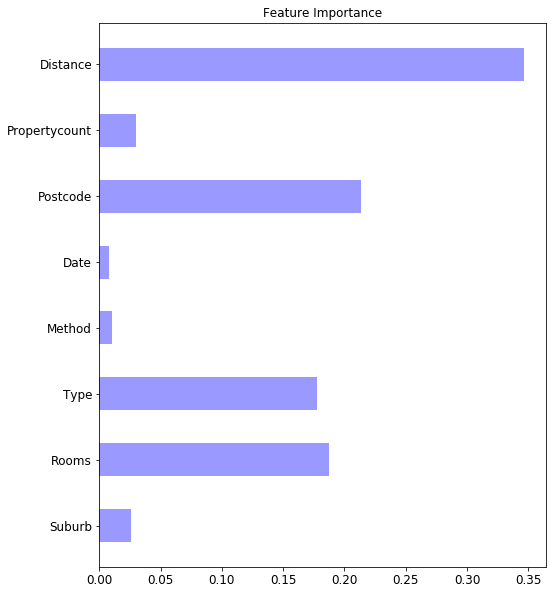

In [39]:
features = X.columns
index = np.arange(len(features)) 
sorted_idx = np.argsort(xgb.feature_importances_)
fig = plt.figure(figsize=(8, 10)) 
bar_width = 0.5 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
rects = plt.barh(X.columns, xgb.feature_importances_, bar_width, alpha=0.4, color= 'b', label='Main') 
plt.title('Feature Importance') 
plt.yticks(index, features)
